In [53]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.nn.parameter import Parameter

## XOR - np

Implement the forward pass for approximating the XOR function

In [10]:
relu = lambda x: np.maximum(np.zeros(x.shape), x)
xor = lambda u, W, c, x: u.T @ relu(W.T @ x + c)
# we can potentially also introduce another bias b

W = np.random.rand(2, 2)
u, c = np.random.rand(2), np.random.rand(2)

x = np.array([0, 0])
for ii in range(1):
	fx = xor(u, W, c, x)
	# x = x - eps * grad

# To make the above algorithm complete, we need to compute the derivative of fx wrt x

# Instead, we take the (analytic) solution from the book (page 170)
W = np.array([[1, 1], [1, 1]])
c = np.array([0, -1])
u = np.array([1, -2])

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

print('X @ W :')
print(X @ W)
print()
print('X @ W + c :')
print(X @ W + c)
print()
print('relu(X @ W + c) :')
print(relu(X @ W + c))
print()
print('relu(X @ W + c) @ u.T:')
print(relu(X @ W + c)@ u.T)

X @ W :
[[0 0]
 [1 1]
 [1 1]
 [2 2]]

X @ W + c :
[[ 0 -1]
 [ 1  0]
 [ 1  0]
 [ 2  1]]

relu(X @ W + c) :
[[0. 0.]
 [1. 0.]
 [1. 0.]
 [2. 1.]]

relu(X @ W + c) @ u.T:
[0. 1. 1. 0.]


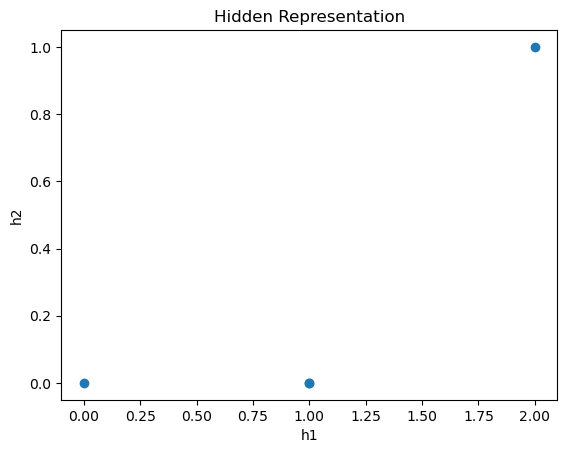

In [11]:
H = relu(X @ W + c)
plt.scatter(H[:, 0], H[:, 1])
plt.title('Hidden Representation')
plt.xlabel('h1')
plt.ylabel('h2')
plt.show()


## XOR - torch

In [47]:
# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [48]:
class NeuralNet(torch.nn.Module):
	def __init__(self):
		super(NeuralNet, self).__init__()
		self.fc1 = torch.nn.Linear(2, 2, bias=True) 
		self.relu = torch.nn.ReLU()
		self.fc2 = torch.nn.Linear(2, 1, bias=False)  

	def forward(self, x):
		out = self.fc1(x)
		out = self.relu(out)
		out = self.fc2(out)
		return out


learning_rate = 0.1
model = NeuralNet().to(device)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [49]:
# Sets parameters

W = np.array([[1, 1], [1, 1]]).astype(np.float32) + 0.1*np.random.rand(2, 2).astype(np.float32)
c = np.array([0, -1]).astype(np.float32) + 0.1*np.random.rand(2).astype(np.float32)
u = np.array([1, -2]).astype(np.float32) + 0.1*np.random.rand(2).astype(np.float32)

model.fc1.weight = Parameter(torch.from_numpy(W))
model.fc1.bias = Parameter(torch.from_numpy(c))
model.fc2.weight = Parameter(torch.from_numpy(u))

In [50]:
#  Sets data and target
X = torch.from_numpy(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).astype(np.float32))
Y = torch.from_numpy(np.array([0, 1, 1, 0]).astype(np.float32))

In [51]:
# Train the model
for j in range(10000):
	
	outputs = model(X)
	loss = criterion(outputs, Y)

	optimizer.zero_grad()
	loss.backward()
	optimizer.step()

	if (j+1) % 100 == 0: 
		print('Epoch {}, loss = {:.4f}'.format(j, loss.item()))



Epoch 99, loss = 0.0058
Epoch 199, loss = 0.0058
Epoch 299, loss = 0.0058
Epoch 399, loss = 0.0058
Epoch 499, loss = 0.0058
Epoch 599, loss = 0.0058
Epoch 699, loss = 0.0058
Epoch 799, loss = 0.0058
Epoch 899, loss = 0.0058
Epoch 999, loss = 0.0058
Epoch 1099, loss = 0.0058
Epoch 1199, loss = 0.0058
Epoch 1299, loss = 0.0058
Epoch 1399, loss = 0.0058
Epoch 1499, loss = 0.0058
Epoch 1599, loss = 0.0058
Epoch 1699, loss = 0.0058
Epoch 1799, loss = 0.0058
Epoch 1899, loss = 0.0058
Epoch 1999, loss = 0.0058
Epoch 2099, loss = 0.0058
Epoch 2199, loss = 0.0058
Epoch 2299, loss = 0.0058
Epoch 2399, loss = 0.0058
Epoch 2499, loss = 0.0058
Epoch 2599, loss = 0.0058
Epoch 2699, loss = 0.0058
Epoch 2799, loss = 0.0058
Epoch 2899, loss = 0.0058
Epoch 2999, loss = 0.0058
Epoch 3099, loss = 0.0058
Epoch 3199, loss = 0.0058
Epoch 3299, loss = 0.0058
Epoch 3399, loss = 0.0058
Epoch 3499, loss = 0.0058
Epoch 3599, loss = 0.0058
Epoch 3699, loss = 0.0058
Epoch 3799, loss = 0.0058
Epoch 3899, loss = 0.00

In [52]:
O = model(X)
print(O.detach().cpu().numpy())

print(model.fc1.weight.detach().numpy())
print(model.fc1.bias.detach().numpy())
print(model.fc2.weight.detach().numpy())

[ 0.0142457   0.87374294  0.9420831  -0.06114657]
[[1.0342499 1.0920776]
 [1.0082178 1.0727432]]
[ 0.01400441 -0.9451802 ]
[ 1.0172297 -1.9707638]


## Using torch 

Introduce the MNIST dataset

In [56]:
# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [57]:
# Hyperparameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [58]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data/',
										   train=True,
										   transform=transforms.ToTensor(),
										   download=True)

test_dataset = torchvision.datasets.MNIST(root='./data/',
										  train=False,
										  transform=transforms.ToTensor())

0.3%

100.0%


Extracting ./data/MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST\raw



100.0%


Extracting ./data/MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST\raw



100.0%


Extracting ./data/MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST\raw



100.0%

Extracting ./data/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST\raw



In [59]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
										   batch_size=batch_size,
										   shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
										  batch_size=batch_size,
										  shuffle=False)

In [60]:
images, labels = next(iter(train_loader))

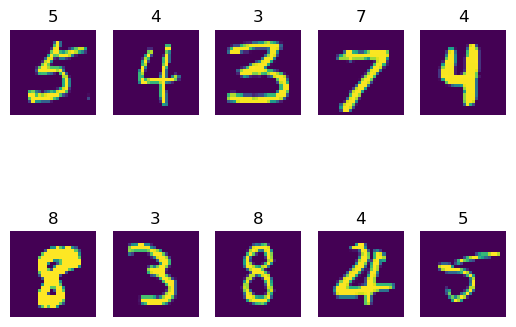

In [61]:
fig, axs = plt.subplots(2, 5)
for ii in range(2):
	for jj in range(5):
		idx = 5 * ii + jj
		axs[ii, jj].imshow(images[idx].squeeze())
		axs[ii, jj].set_title(labels[idx].item())
		axs[ii, jj].axis('off')
plt.show()

In [62]:
# Fully connected neural network
class NeuralNet(nn.Module):
	def __init__(self, input_size, hidden_size, num_classes):
		super(NeuralNet, self).__init__()
		self.fc1 = nn.Linear(input_size, hidden_size) 
		self.relu = nn.ReLU()
		self.fc2 = nn.Linear(hidden_size, num_classes)  

	def forward(self, x):
		out = self.fc1(x)
		out = self.relu(out)
		out = self.fc2(out)
		return out

In [63]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [64]:
# train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
	for i, (images, labels) in enumerate(train_loader):
		images = images.reshape(-1, input_size).to(device)
		labels = labels.to(device)

		outputs = model(images)
		loss = criterion(outputs, labels)

		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		if (i+1) % 100 == 0:
			print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
				.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.2922
Epoch [1/5], Step [200/600], Loss: 0.2797
Epoch [1/5], Step [300/600], Loss: 0.2837
Epoch [1/5], Step [400/600], Loss: 0.2091
Epoch [1/5], Step [500/600], Loss: 0.0991
Epoch [1/5], Step [600/600], Loss: 0.1407
Epoch [2/5], Step [100/600], Loss: 0.1582
Epoch [2/5], Step [200/600], Loss: 0.0643
Epoch [2/5], Step [300/600], Loss: 0.2297
Epoch [2/5], Step [400/600], Loss: 0.0535
Epoch [2/5], Step [500/600], Loss: 0.1064
Epoch [2/5], Step [600/600], Loss: 0.1306
Epoch [3/5], Step [100/600], Loss: 0.0305
Epoch [3/5], Step [200/600], Loss: 0.1310
Epoch [3/5], Step [300/600], Loss: 0.0429
Epoch [3/5], Step [400/600], Loss: 0.0476
Epoch [3/5], Step [500/600], Loss: 0.0865
Epoch [3/5], Step [600/600], Loss: 0.0656
Epoch [4/5], Step [100/600], Loss: 0.0646
Epoch [4/5], Step [200/600], Loss: 0.0557
Epoch [4/5], Step [300/600], Loss: 0.1061
Epoch [4/5], Step [400/600], Loss: 0.0275
Epoch [4/5], Step [500/600], Loss: 0.0694
Epoch [4/5], Step [600/600], Loss:

In [65]:
# test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 97.79 %
